In [ ]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
100% 217M/218M [00:23<00:00, 11.3MB/s]
100% 218M/218M [00:23<00:00, 9.80MB/s]


In [ ]:
!unzip cat-and-dog.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

In [ ]:
!pip install --upgrade tensorflow keras numpy pandas matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 601.3/601.3 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 71.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 73.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 73.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 110.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 105.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 44.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 114.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 75.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.7/347.7 kB 39.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.2
    Uninstalling numpy-1.25.2:
      Successfully uninstalled numpy-1.25.2
  Attempting uninstall: tensorboard
    Fou

In [ ]:
pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 90.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


# Import packages

In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.models import Model,Sequential
import matplotlib.pyplot as plt
import random
from  PIL import Image

In [ ]:
print(tf.__version__)
print(keras.__version__)

2.17.0
3.4.1


# Step we can follow
- First we can check the distrubution of data.
- Second we can check the format of data so that we can check that any format or corrupt image are present or not.
- Third we can load the data using image data-generator and we can also use `Data Augmentation`.

# Distrubution of Data

In [ ]:
train_dir='/content/training_set/training_set'
test_dir='/content/test_set/test_set'

# Check the distrubution of train and test dat

In [ ]:
dog_dis=len(os.listdir(os.path.join(train_dir,os.listdir(train_dir)[0])))
cat_dis=len(os.listdir(os.path.join(train_dir,os.listdir(train_dir)[1])))

In [ ]:
classes=["dog","cat"]
count=[dog_dis,cat_dis]

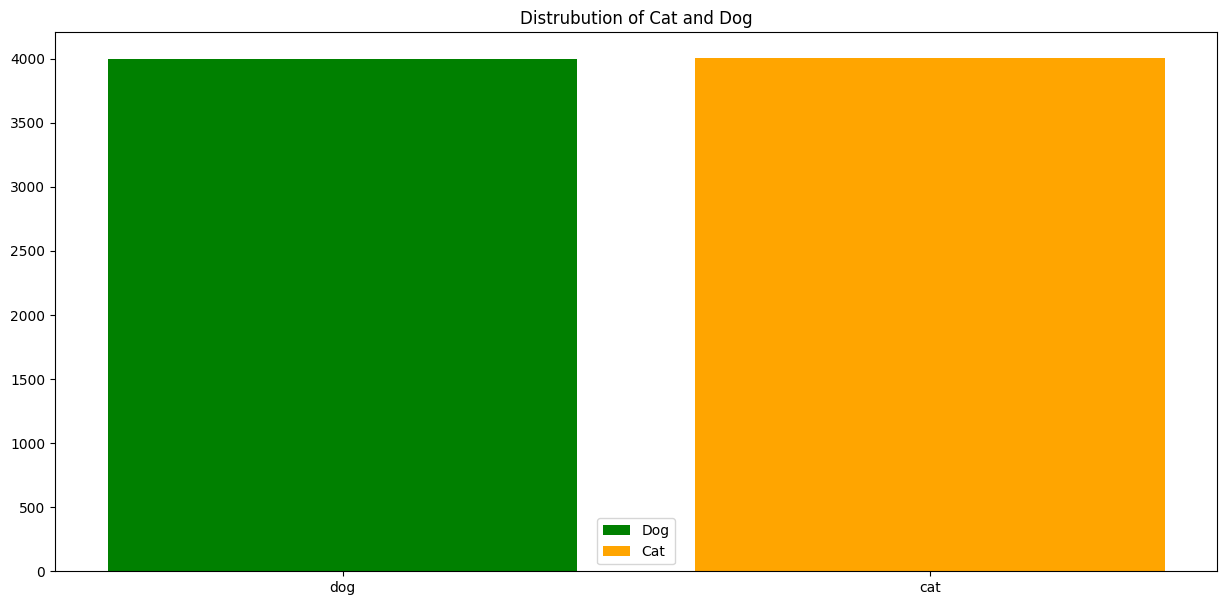

In [ ]:
plt.figure(figsize=(15,7))
plt.title("Distrubution of Cat and Dog")
plt.bar(classes,count,label=["Dog","Cat"],color=["Green","Orange"])
plt.legend()
plt.show()

# check Few image

In [ ]:
def show_image(dir,nbr_of_image):
  images=os.listdir(dir)

  images=random.sample(images,k=nbr_of_image)

  plt.figure(figsize=(15,7))
  for i in range(nbr_of_image):
    plt.title(f"Images: {images[i]}")
    img=Image.open(os.path.join(dir,images[i]))
    plt.subplot(1,nbr_of_image,i+1)
    plt.imshow(img)
    plt.axis("off")

  return images

# Dog Images

<ipython-input-10-7ba7e0ff719e>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,nbr_of_image,i+1)


['dog.3153.jpg', 'dog.250.jpg', 'dog.1676.jpg', 'dog.2563.jpg', 'dog.3818.jpg']

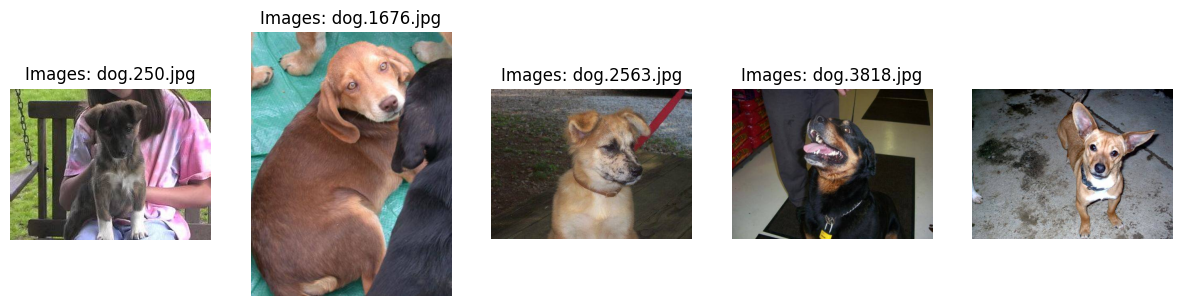

In [ ]:
show_image(os.path.join(train_dir,"dogs"),nbr_of_image=5)

# Cats

<ipython-input-10-7ba7e0ff719e>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,nbr_of_image,i+1)


['cat.2195.jpg', 'cat.464.jpg', 'cat.1659.jpg', 'cat.170.jpg', 'cat.2869.jpg']

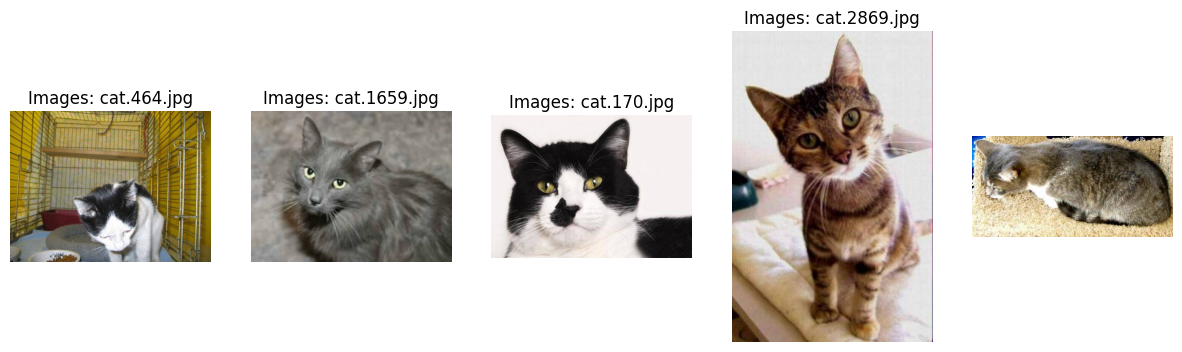

In [ ]:
show_image(os.path.join(train_dir,"cats"),nbr_of_image=5)

# Data Cleaning
- In this we can remove corrupt images

In [ ]:
def remove_corrupt_images(dir):
  image=os.listdir(dir)
  for img in image:
    if img.endswith((".jpg",".jpeg",".png")):
      try:
        img=Image.open(os.path.join(dir,img))
        img.verify()
      except:
        os.remove(os.path.join(dir,img))
        print(f"Removing corrupt image {img}")
    else:
      os.remove(os.path.join(dir,img))
      print(f"Removing corrupt image {img}")

# Remove Corrupt img form `dog` dir

In [ ]:
remove_corrupt_images(os.path.join(train_dir,"dogs"))

Removing corrupt image _DS_Store


# Removing corrupt image form `cat` dir

In [ ]:
remove_corrupt_images(os.path.join(train_dir,"dogs"))

# Conclussion
- 1 Corrupt image found in `dog` dir so we can remove them.

# Image to array

In [ ]:
def image_to_array(image_path):
  """
  1- we can read the image
  2- we can convert the image into array
  3- we can return the image array shape
  """

  try:
    image=Image.open(image_path)
    img_array=np.array(image)

    return img_array
  except Exception as e:
    return e


# Try on dog

array([[[145, 122,  68],
        [138, 113,  57],
        [131, 104,  49],
        ...,
        [136, 120,  97],
        [136, 120,  97],
        [135, 119,  96]],

       [[148, 123,  69],
        [141, 116,  62],
        [139, 109,  55],
        ...,
        [137, 121,  98],
        [137, 121,  98],
        [136, 120,  97]],

       [[146, 118,  68],
        [141, 114,  61],
        [141, 111,  57],
        ...,
        [135, 119,  96],
        [135, 119,  96],
        [134, 118,  95]],

       ...,

       [[179, 199, 210],
        [183, 203, 214],
        [188, 208, 219],
        ...,
        [ 99,  93,  81],
        [ 98,  92,  80],
        [ 97,  91,  79]],

       [[175, 195, 206],
        [178, 198, 209],
        [184, 204, 215],
        ...,
        [100,  94,  82],
        [100,  94,  82],
        [100,  94,  82]],

       [[171, 191, 202],
        [174, 194, 205],
        [180, 200, 211],
        ...,
        [100,  94,  82],
        [101,  95,  83],
        [101,  95,  83]]], dtype=uint8)
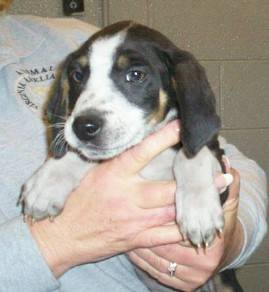

In [ ]:
image_to_array("/content/training_set/training_set/dogs/dog.10.jpg")

array([[[145, 122,  68],
        [138, 113,  57],
        [131, 104,  49],
        ...,
        [136, 120,  97],
        [136, 120,  97],
        [135, 119,  96]],

       [[148, 123,  69],
        [141, 116,  62],
        [139, 109,  55],
        ...,
        [137, 121,  98],
        [137, 121,  98],
        [136, 120,  97]],

       [[146, 118,  68],
        [141, 114,  61],
        [141, 111,  57],
        ...,
        [135, 119,  96],
        [135, 119,  96],
        [134, 118,  95]],

       ...,

       [[179, 199, 210],
        [183, 203, 214],
        [188, 208, 219],
        ...,
        [ 99,  93,  81],
        [ 98,  92,  80],
        [ 97,  91,  79]],

       [[175, 195, 206],
        [178, 198, 209],
        [184, 204, 215],
        ...,
        [100,  94,  82],
        [100,  94,  82],
        [100,  94,  82]],

       [[171, 191, 202],
        [174, 194, 205],
        [180, 200, 211],
        ...,
        [100,  94,  82],
        [101,  95,  83],
        [101,  95,  83]]], dtype=uint8)
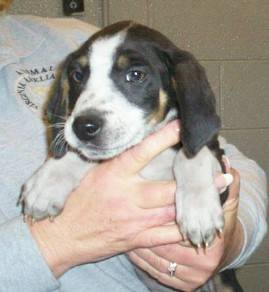

In [ ]:
image_to_array("/content/training_set/training_set/dogs/dog.10.jpg")

# Try Cat

array([[[ 26,  30,  39],
        [ 24,  28,  37],
        [ 19,  23,  32],
        ...,
        [126, 158, 155],
        [125, 157, 154],
        [125, 157, 154]],

       [[ 29,  33,  42],
        [ 29,  33,  42],
        [ 26,  30,  39],
        ...,
        [126, 158, 155],
        [125, 157, 154],
        [124, 156, 153]],

       [[ 30,  34,  43],
        [ 34,  38,  47],
        [ 35,  39,  48],
        ...,
        [127, 159, 156],
        [126, 158, 155],
        [124, 156, 153]],

       ...,

       [[165, 151, 114],
        [163, 149, 110],
        [156, 142, 103],
        ...,
        [175, 170,   6],
        [172, 166,   6],
        [166, 160,   2]],

       [[160, 146, 111],
        [159, 145, 108],
        [153, 139, 102],
        ...,
        [175, 171,   2],
        [172, 167,   3],
        [166, 161,   0]],

       [[154, 140, 105],
        [154, 140, 103],
        [150, 136,  99],
        ...,
        [175, 171,   2],
        [172, 167,   3],
        [166, 161,   0]]], dtype=uint8)
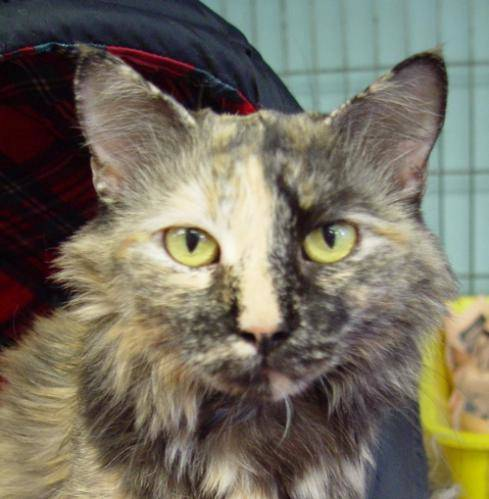

In [ ]:
image_to_array("/content/training_set/training_set/cats/cat.10.jpg")

array([[[ 26,  30,  39],
        [ 24,  28,  37],
        [ 19,  23,  32],
        ...,
        [126, 158, 155],
        [125, 157, 154],
        [125, 157, 154]],

       [[ 29,  33,  42],
        [ 29,  33,  42],
        [ 26,  30,  39],
        ...,
        [126, 158, 155],
        [125, 157, 154],
        [124, 156, 153]],

       [[ 30,  34,  43],
        [ 34,  38,  47],
        [ 35,  39,  48],
        ...,
        [127, 159, 156],
        [126, 158, 155],
        [124, 156, 153]],

       ...,

       [[165, 151, 114],
        [163, 149, 110],
        [156, 142, 103],
        ...,
        [175, 170,   6],
        [172, 166,   6],
        [166, 160,   2]],

       [[160, 146, 111],
        [159, 145, 108],
        [153, 139, 102],
        ...,
        [175, 171,   2],
        [172, 167,   3],
        [166, 161,   0]],

       [[154, 140, 105],
        [154, 140, 103],
        [150, 136,  99],
        ...,
        [175, 171,   2],
        [172, 167,   3],
        [166, 161,   0]]], dtype=uint8)
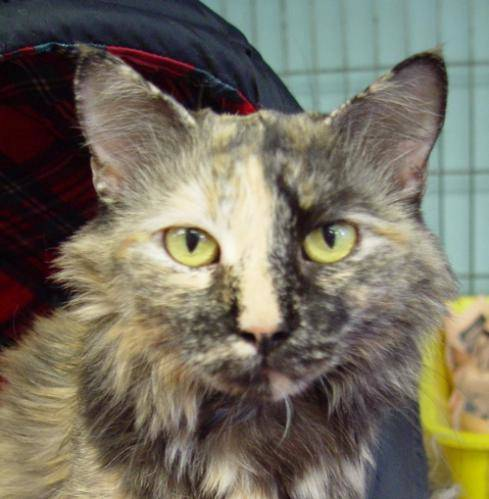

In [ ]:
image_to_array("/content/training_set/training_set/cats/cat.10.jpg")

# Load Data
- In this step we can use `Image Data Generator` to load data efficently

# Build Generator

In [ ]:
# Train Generator
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Test Generator
test_datagen=ImageDataGenerator(
    rescale=1./255
)

# Apply Generator

In [ ]:
# train generator
train_generator=train_datagen.flow_from_directory(
    directory=train_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="binary"
)

# test generator
test_generator=train_datagen.flow_from_directory(
    directory=test_dir,
    target_size=(224,224),
    batch_size=32,
    class_mode="binary"
)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


# Check classes

In [ ]:
print("Class Label Assign by image data generator on train data: ",train_generator.class_indices)
print("Class Label Assign by image data generator on test data: ",test_generator.class_indices)

Class Label Assign by image data generator on train data:  {'cats': 0, 'dogs': 1}
Class Label Assign by image data generator on test data:  {'cats': 0, 'dogs': 1}


# Model Building

- First we can make our `CNN` artitucture.
- Second we can use `transfer learning`.

In [ ]:
os.makedirs(os.path.join("Cat-Dog-Classification","Our-Artitucture","model"))
os.makedirs(os.path.join("Cat-Dog-Classification","Transfer-Learning","model"))

In [ ]:
model=Sequential()

# add a CNN layer
model.add(layers.Conv2D(32,(3,3),activation="relu",input_shape=(224,224,3)))
# Add a pooling layer
model.add(layers.MaxPooling2D((2,2)))

# add a CNN layer
model.add(layers.Conv2D(62,(3,3),activation="relu",input_shape=(224,224,3)))
# Add a pooling layer
model.add(layers.MaxPooling2D((2,2)))

# add a CNN layer
model.add(layers.Conv2D(128,(3,3),activation="relu",input_shape=(224,224,3)))
# Add a pooling layer
model.add(layers.MaxPooling2D((2,2)))

# add a flatten layer
model.add(layers.Flatten())

# add a Fully Cocnnected layer
model.add(layers.Dense(512,activation="relu"))

# add a output layer
model.add(layers.Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Summary of model

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 62)        │          17,918 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 62)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          71,552 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      44,302,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,393,727 (169.35 MB)

 Trainable params: 44,393,727 (169.35 MB)

 Non-trainable params: 0 (0.00 B)

# Compile the model

In [ ]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Add a `Early Stoping
- For Early Stoping we can stop the model if model can overfit

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [ ]:
early_stop=EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=5,
    verbose=1,
    mode="auto",
    restore_best_weights=True
)

# Add a check point
- Using `Checkpoint` we can save the model for every epochs

In [ ]:
checkpoint=ModelCheckpoint(
    filepath='/content/Cat-Dog-Classification/Our-Architecture/model_epoch_{epoch:02d}_val_loss_{val_loss:.4f}.keras',
    monitor="val_loss",
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode="auto",
    save_freq='epoch'
    )

In [ ]:
history=model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//train_generator.batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples//test_generator.batch_size,
    callbacks=[early_stop,checkpoint]
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step - accuracy: 0.5562 - loss: 0.6879
Epoch 1: val_loss improved from inf to 0.64455, saving model to /content/Cat-Dog-Classification/Our-Architecture/model_epoch_01_val_loss_0.6446.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 157s 588ms/step - accuracy: 0.5563 - loss: 0.6879 - val_accuracy: 0.6022 - val_loss: 0.6446
Epoch 2/10
  1/250 ━━━━━━━━━━━━━━━━━━━━ 17s 70ms/step - accuracy: 0.5312 - loss: 0.6282

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)



Epoch 2: val_loss improved from 0.64455 to 0.63436, saving model to /content/Cat-Dog-Classification/Our-Architecture/model_epoch_02_val_loss_0.6344.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.5312 - loss: 0.6282 - val_accuracy: 0.5714 - val_loss: 0.6344
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step - accuracy: 0.6530 - loss: 0.6219
Epoch 3: val_loss improved from 0.63436 to 0.58110, saving model to /content/Cat-Dog-Classification/Our-Architecture/model_epoch_03_val_loss_0.5811.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 188s 593ms/step - accuracy: 0.6531 - loss: 0.6219 - val_accuracy: 0.7034 - val_loss: 0.5811
Epoch 4/10
  1/250 ━━━━━━━━━━━━━━━━━━━━ 18s 75ms/step - accuracy: 0.6562 - loss: 0.6483
Epoch 4: val_loss improved from 0.58110 to 0.46079, saving model to /content/Cat-Dog-Classification/Our-Architecture/model_epoch_04_val_loss_0.4608.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.6562 - loss: 0.6483 - val_accuracy: 0.8571 - val_loss: 0.4608
Epo

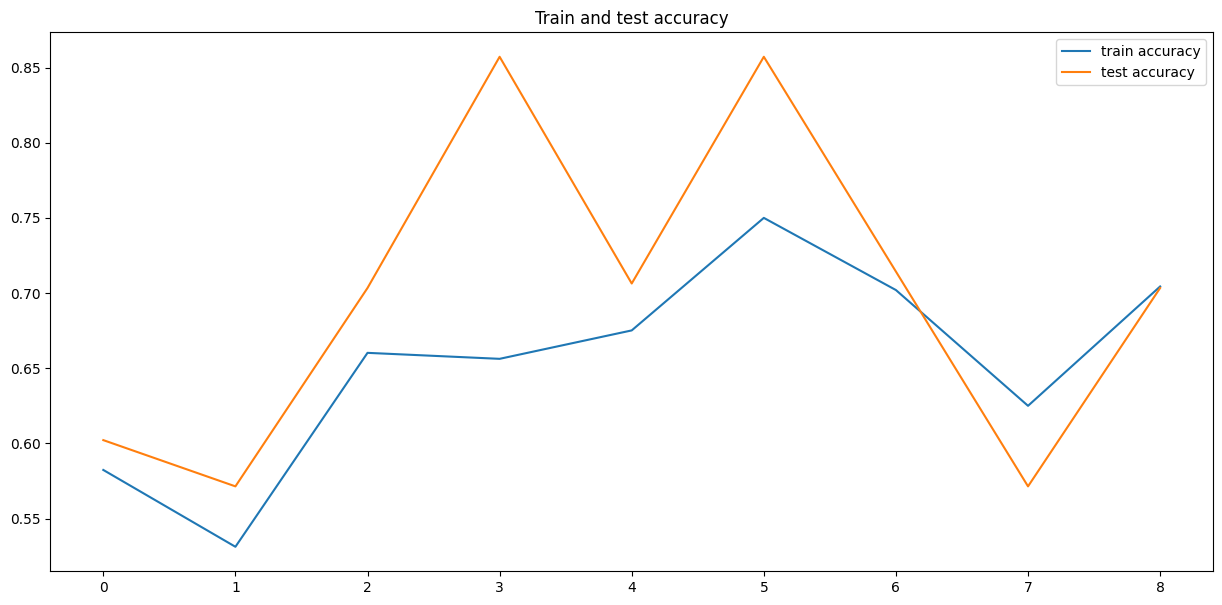

In [ ]:
plt.figure(figsize=(15,7))
plt.title("Train and test accuracy")
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='test accuracy')
plt.legend()
plt.show()

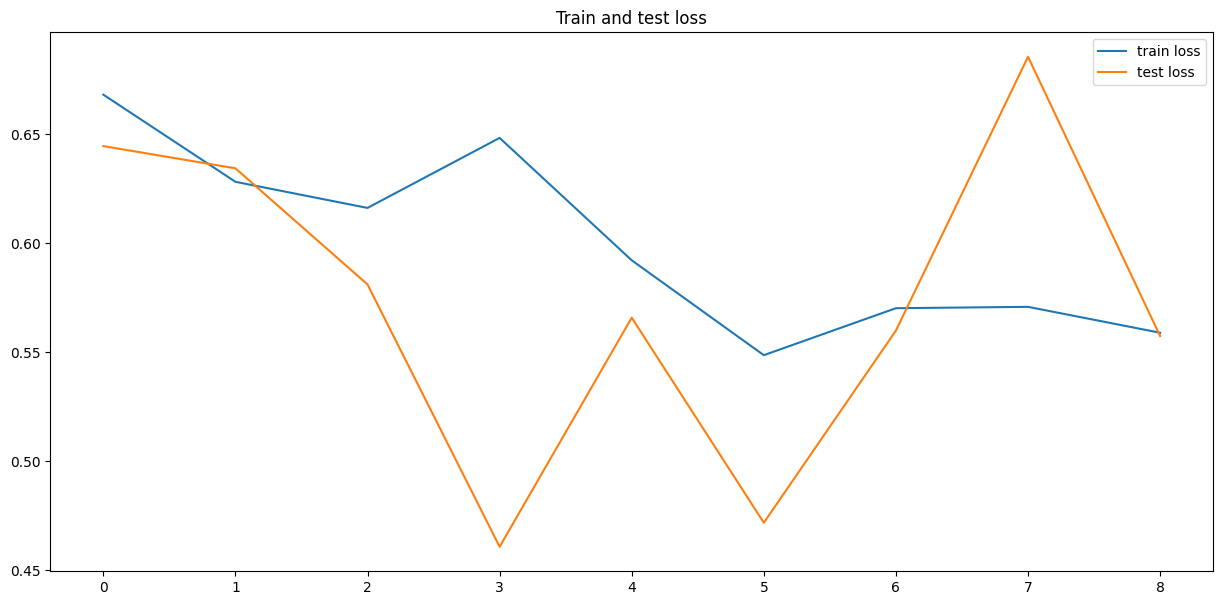

In [ ]:
plt.figure(figsize=(15,7))
plt.title("Train and test loss")
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='test loss')
plt.legend()
plt.show()

# Load the save model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
train_model=load_model('/content/Cat-Dog-Classification/Our-Architecture/model_epoch_04_val_loss_0.4608.keras')

# Prediction

In [ ]:
def process_predict_image(image_path,model,name):
  # Open the path
  img=Image.open(image_path)
  # resize the image
  img=img.resize((224,224))
  #  convert to array
  img_array=np.array(img)

  # Expend dimesnion
  img_array=np.expand_dims(img_array,axis=0)

  # Prediction
  prediction=model.predict(img_array)
  if prediction>0.5:
    prediction="Dog"
  else:
    prediction='Cat'

  fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,7))
  ax1.set_title(f"Original Image {name}")
  ax1.imshow(img)
  ax2.set_title(f"Predicted Image {prediction}")
  ax2.imshow(img_array[0])
  plt.show()

  return

# Prediction for `Dog`

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 820ms/step


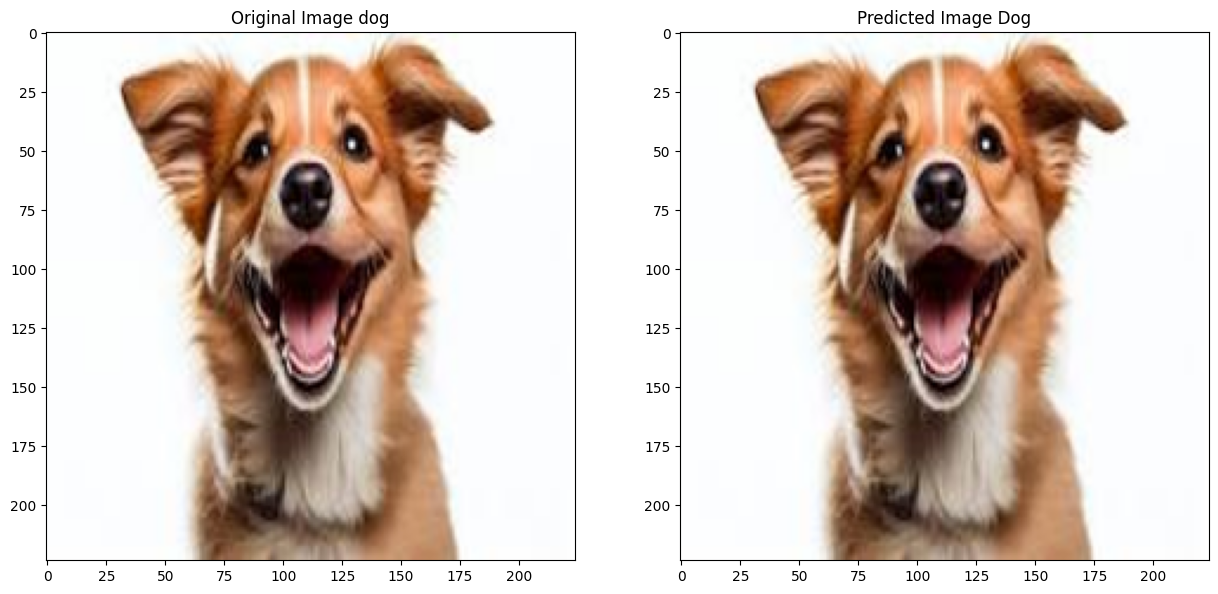

In [ ]:
process_predict_image('/content/dog.jpeg',model=train_model,name="dog")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


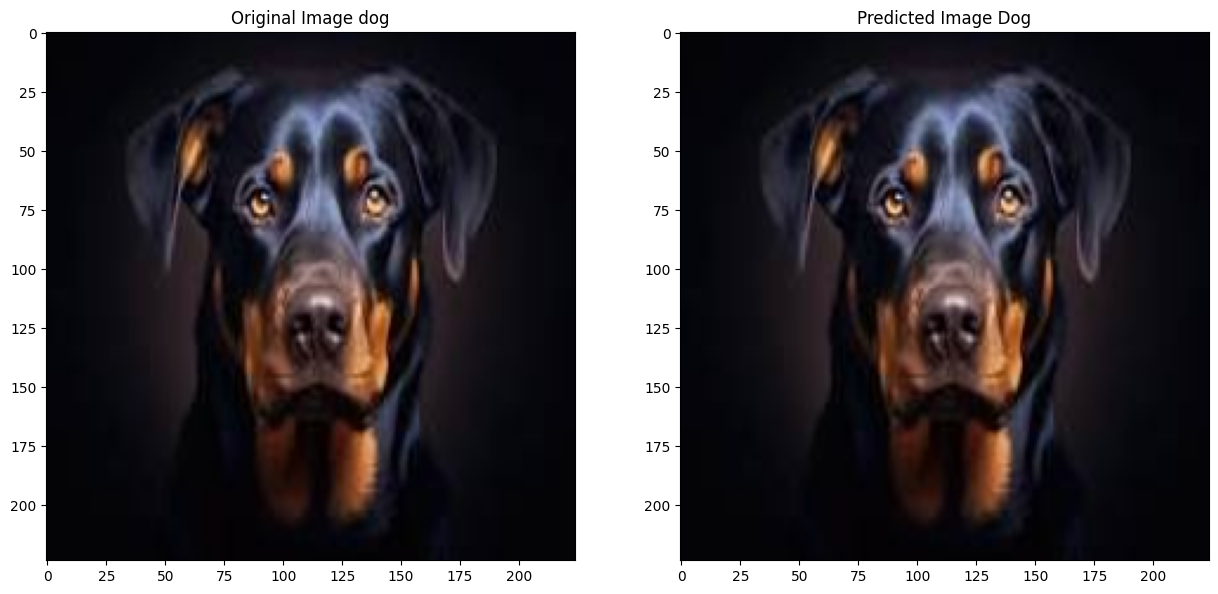

In [ ]:
process_predict_image('/content/dog2.jpeg',model=train_model,name="dog")

# Prediction For `Cat`

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


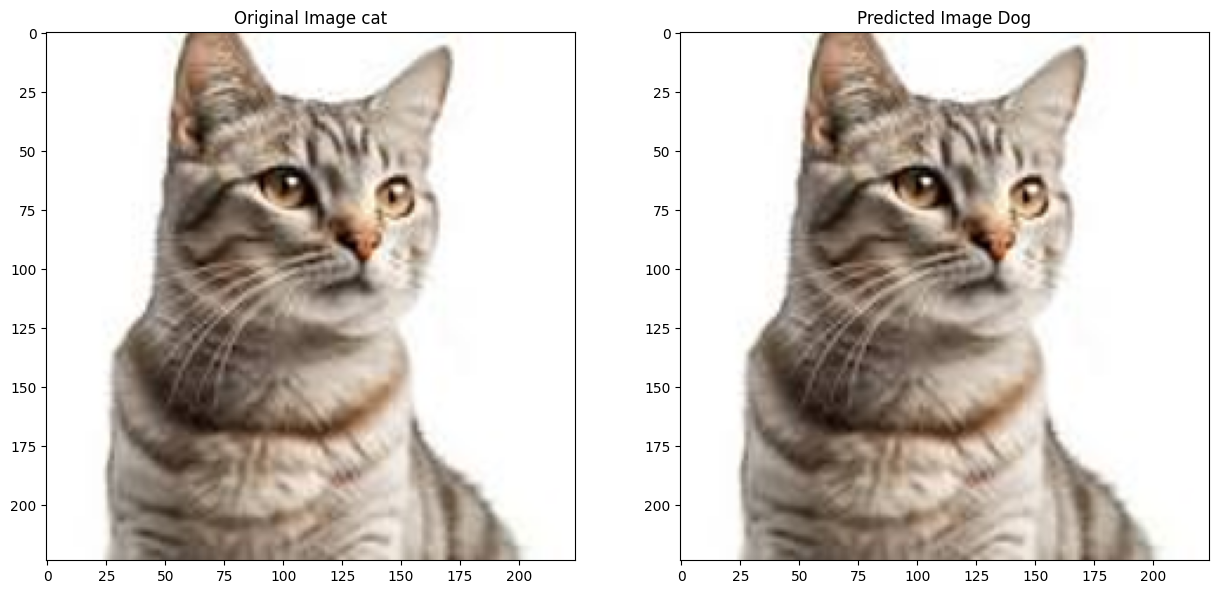

In [ ]:
process_predict_image('/content/cat.jpeg',train_model,name="cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


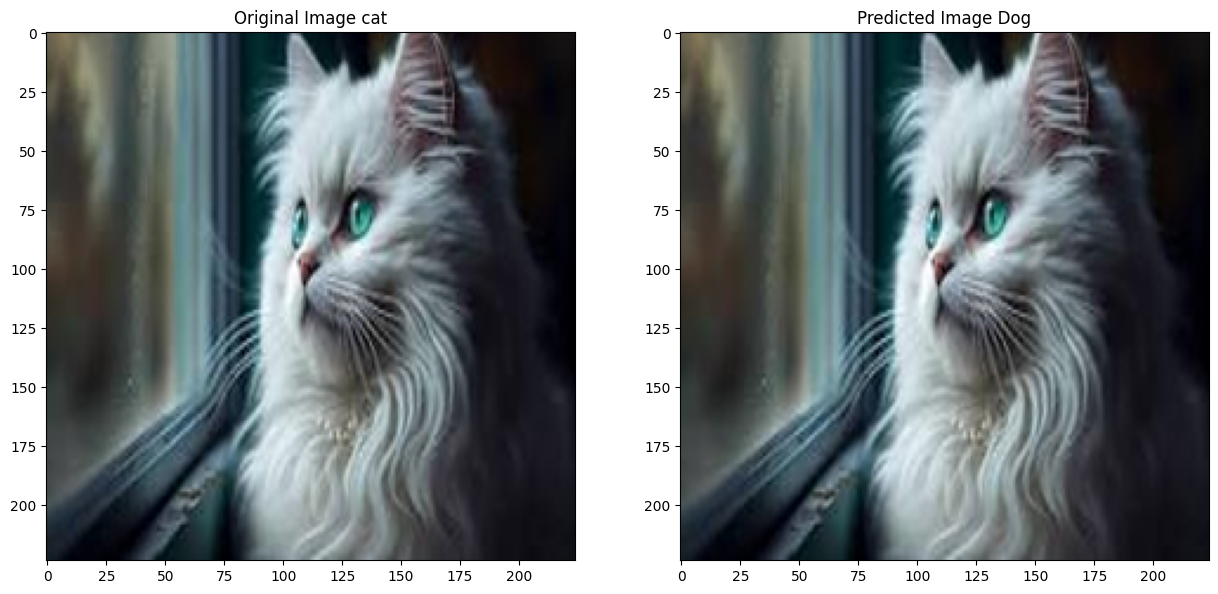

In [ ]:
process_predict_image('/content/cat2.jpeg',train_model,name="cat")

# Conclussion
- In some cases model can't give best results

# Reset the `test generator`

In [ ]:
test_generator.reset()

In [ ]:
prediction=train_model.predict(test_generator,steps=len(test_generator),verbose=1)
prediction

64/64 ━━━━━━━━━━━━━━━━━━━━ 26s 406ms/step


array([[0.7904922 ],
       [0.79851276],
       [0.716403  ],
       ...,
       [0.77775335],
       [0.60829806],
       [0.14005287]], dtype=float32)

# Convert Probility

In [ ]:
# Predicted Classes
pred_class=(prediction>0.5).astype('int32')
pred_class

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [0]], dtype=int32)

In [ ]:
# Actural Class
true_class=test_generator.classes
true_class

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

# Confussion Matric

In [ ]:
!pip install scikit-learn==1.3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 55.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.1
    Uninstalling scikit-learn-1.5.1:
      Successfully uninstalled scikit-learn-1.5.1


In [ ]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score
import seaborn as sns

# Confussion Matrix

In [ ]:
cm=confusion_matrix(true_class,pred_class)
cm

NameError: name 'sns' is not defined

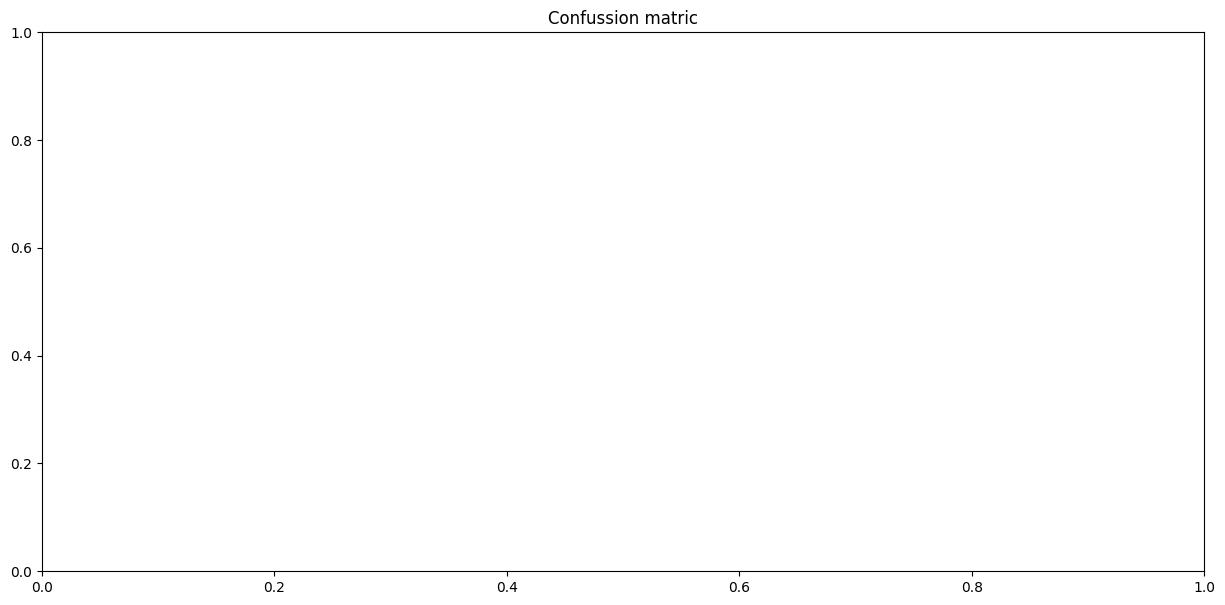

In [ ]:
plt.figure(figsize=(15,7))
plt.title("Confussion matric")
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.xlabel("Actual Class")
plt.ylabel("Predicted Class")
plt.show()

In [ ]:
print("accuracy: ",accuracy_score(true_class,pred_class))
print("precision: ",precision_score(true_class,pred_class))
print("recall: ",recall_score(true_class,pred_class))
print("f1_score: ",f1_score(true_class,pred_class))

In [ ]:
model.save('/content/Cat-Dog-Classification/Our-Architecture/best_model.keras')

# Conclussion
- we can see that model can't predicted well now we can again build a model but at this time we can use `VGG16` as a `pretrain model`

# Classification using `VGG16`

In [ ]:
from tensorflow.keras.applications import VGG16

In [ ]:
base_model=VGG16(weights="imagenet",include_top=False,input_shape=(224,224,3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
print(base_model.output_shape)

(None, 7, 7, 512)


In [ ]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

# Conclussion
- we can load the pretrain model.
- Now we can `Freeze` the layers b/c we can use `transfer learning`.

In [ ]:
base_model.trainable=False

In [ ]:
base_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 14,714,688 (56.13 MB)

# Transfer Learning

In [ ]:
# model=Sequential()

# # add the base model
# model.add(base_model)
# # Add the normilization layer

# model.add(layers.BatchNormalization())

# # add a faltten layer
# model.add(layers.Flatten())

# # add the fully connected layer
# model.add(layers.Dense(512,activation='relu'))

# Note
- Note that if you are working with recent version of `tensorflow` above model structure through an error due to version issue so we can solve this issue  use `Function API`

In [ ]:
inputs=layers.Input(shape=(224,224,3))

# Add the base model
b_model=base_model(inputs,training=False)

# add a batch normilization layer
normilization=layers.BatchNormalization()(b_model)

# Add Flatten layer
flaten=layers.Flatten()(normilization)

# add a fully connected layer with 512 neuron
dense=layers.Dense(units=512,activation='relu')(flaten)

# add a output layer
output=layers.Dense(1,activation='sigmoid')(dense)

# Connect with Functional api

model2=Model(inputs=inputs,outputs=output)

In [ ]:
model2.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 7, 7, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 7, 7, 512)           │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │      12,845,568 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 27,562,817 (105.14 MB)

 Trainable params: 12,847,105 (49.01 MB)

 Non-trainable params: 14,715,712 (56.14 MB)

In [ ]:
model2.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
train_generator.reset()
test_generator.reset()

# Add Early Stoping

In [ ]:
early_stop=EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=5,
    verbose=1,
    mode="auto",
    restore_best_weights=True
)

# Add Checkpoint

In [ ]:
checkpoint=ModelCheckpoint(
    filepath='/content/Cat-Dog-Classification/Transfer-Learning/model_epoch_{epoch:02d}_val_loss_{val_loss:.4f}.keras',
    monitor="val_loss",
    verbose=1,
    save_best_only=True,
    save_weights_only=False,
    mode="auto",
    save_freq='epoch'
    )

In [ ]:
history=model2.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//train_generator.batch_size,
    epochs=100,
    validation_data=test_generator,
    validation_steps=test_generator.samples//test_generator.batch_size,
    callbacks=[early_stop,checkpoint]
)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step - accuracy: 0.7903 - loss: 0.4813
Epoch 1: val_loss improved from inf to 0.30597, saving model to /content/Cat-Dog-Classification/Transfer-Learning/model_epoch_01_val_loss_0.3060.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 171s 606ms/step - accuracy: 0.7905 - loss: 0.4809 - val_accuracy: 0.8656 - val_loss: 0.3060
Epoch 2/100
  1/250 ━━━━━━━━━━━━━━━━━━━━ 39s 158ms/step - accuracy: 0.9375 - loss: 0.2493
Epoch 2: val_loss did not improve from 0.30597
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.9375 - loss: 0.2493 - val_accuracy: 0.7143 - val_loss: 0.3905
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step - accuracy: 0.8826 - loss: 0.2822
Epoch 3: val_loss improved from 0.30597 to 0.28837, saving model to /content/Cat-Dog-Classification/Transfer-Learning/model_epoch_03_val_loss_0.2884.keras
250/250 ━━━━━━━━━━━━━━━━━━━━ 181s 600ms/step - accuracy: 0.8826 - loss: 0.2822 - val_accuracy: 0.8765 - val_loss: 0.2884
Epoch 4/100
  1/250

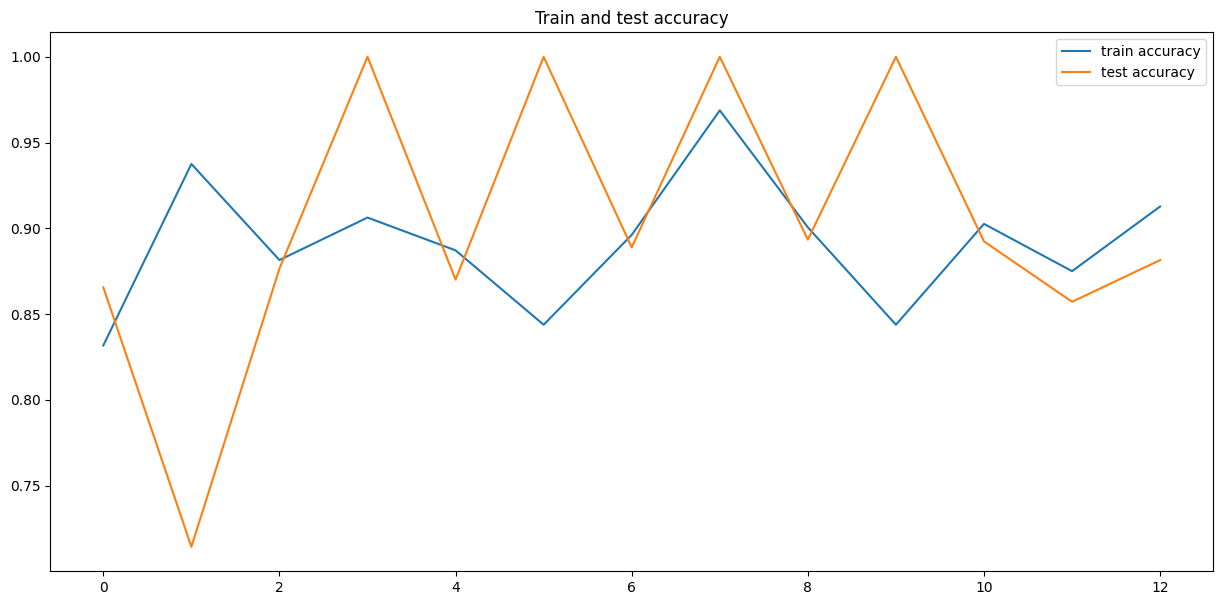

In [ ]:
plt.figure(figsize=(15,7))
plt.title("Train and test accuracy")
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='test accuracy')
plt.legend()
plt.show()

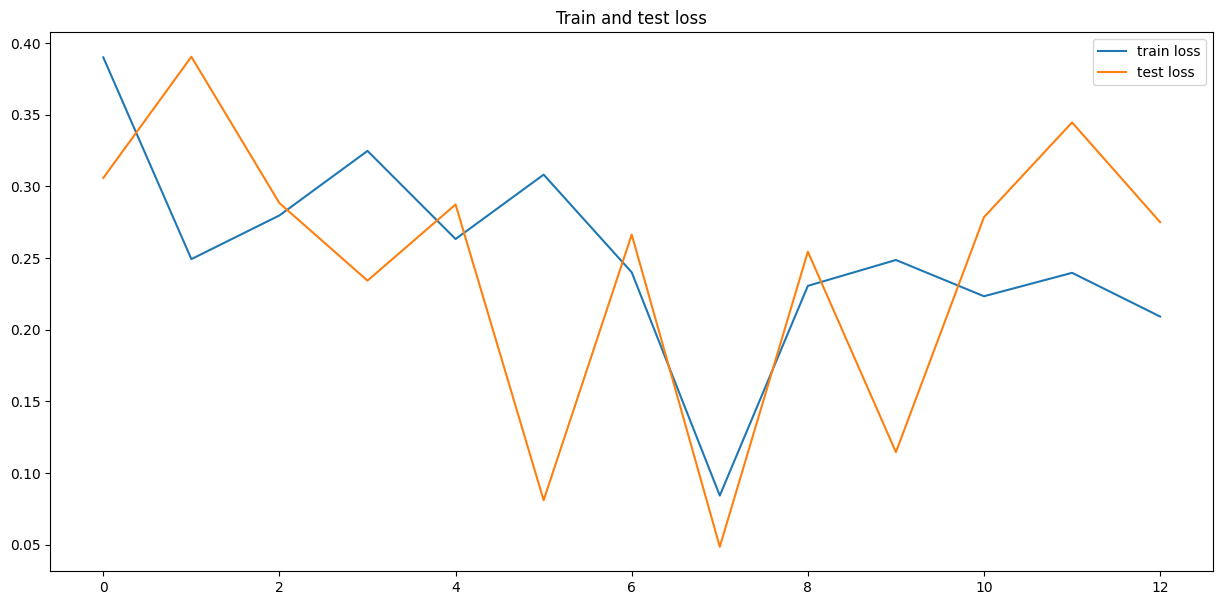

In [ ]:
plt.figure(figsize=(15,7))
plt.title("Train and test loss")
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='test loss')
plt.legend()
plt.show()

# Load the New model

In [ ]:
train_model2=load_model('/content/Cat-Dog-Classification/Transfer-Learning/model_epoch_08_val_loss_0.0486.keras')

# Test on `Dog`

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


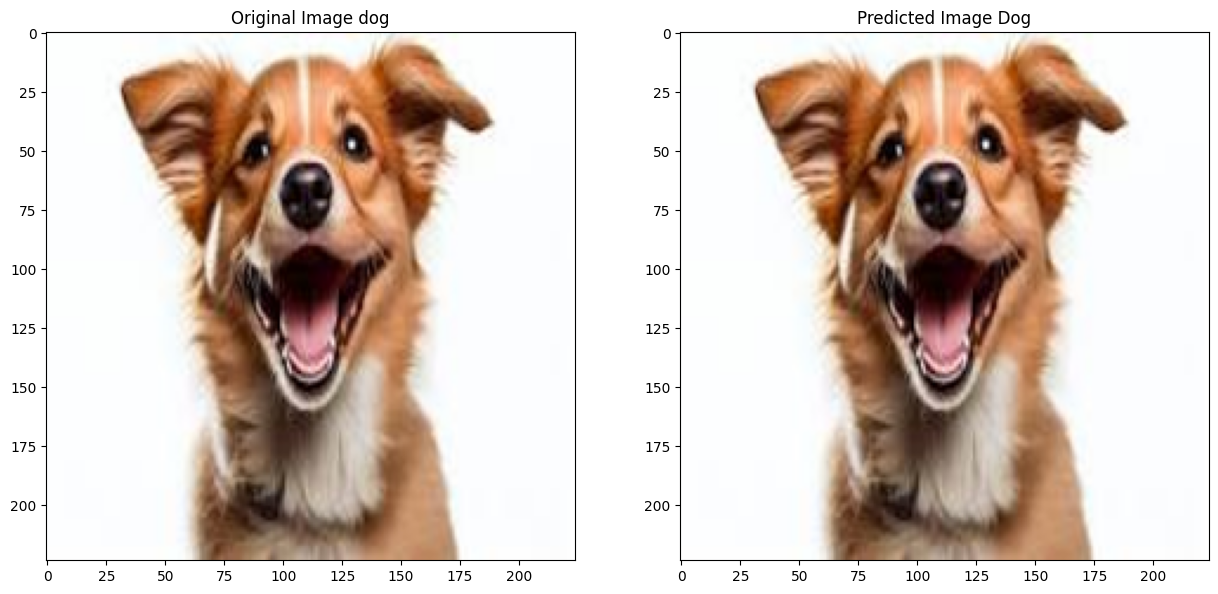

In [ ]:
process_predict_image('/content/dog.jpeg',model=train_model2,name="dog")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


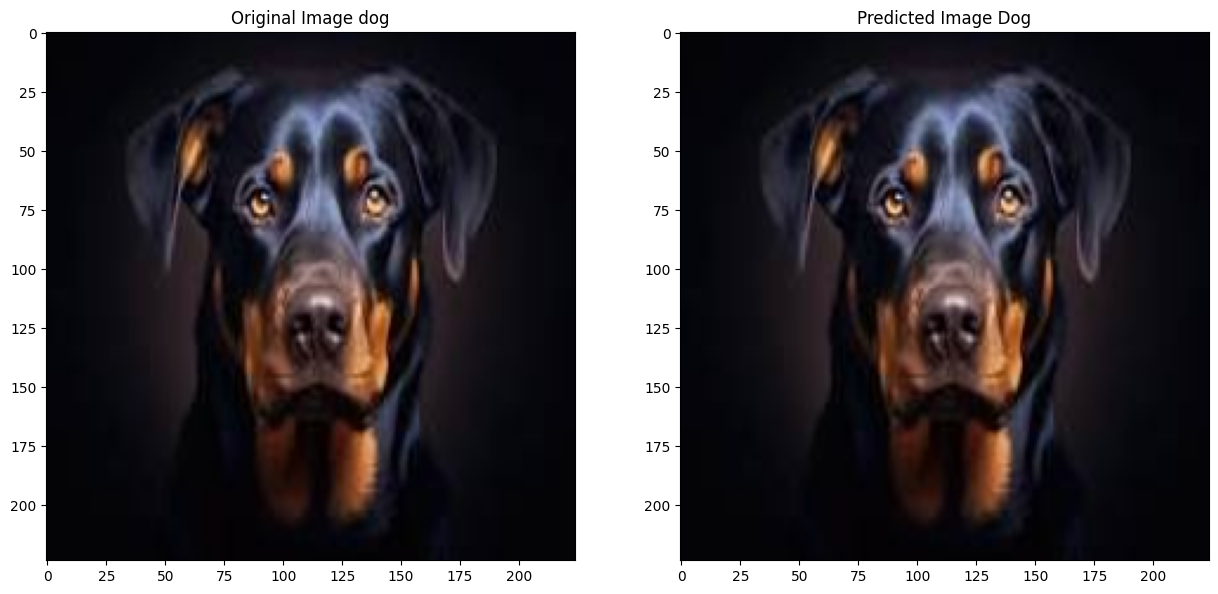

In [ ]:
process_predict_image('/content/dog2.jpeg',model=train_model2,name="dog")

# Test on cat

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


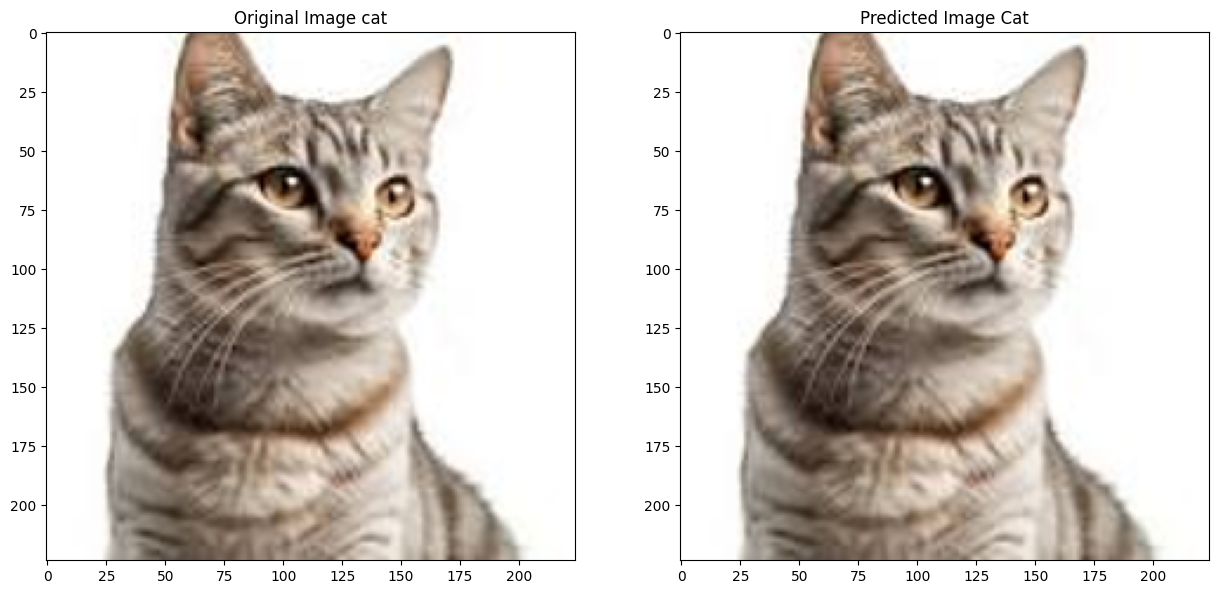

In [ ]:
process_predict_image('/content/cat.jpeg',model=train_model2,name="cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


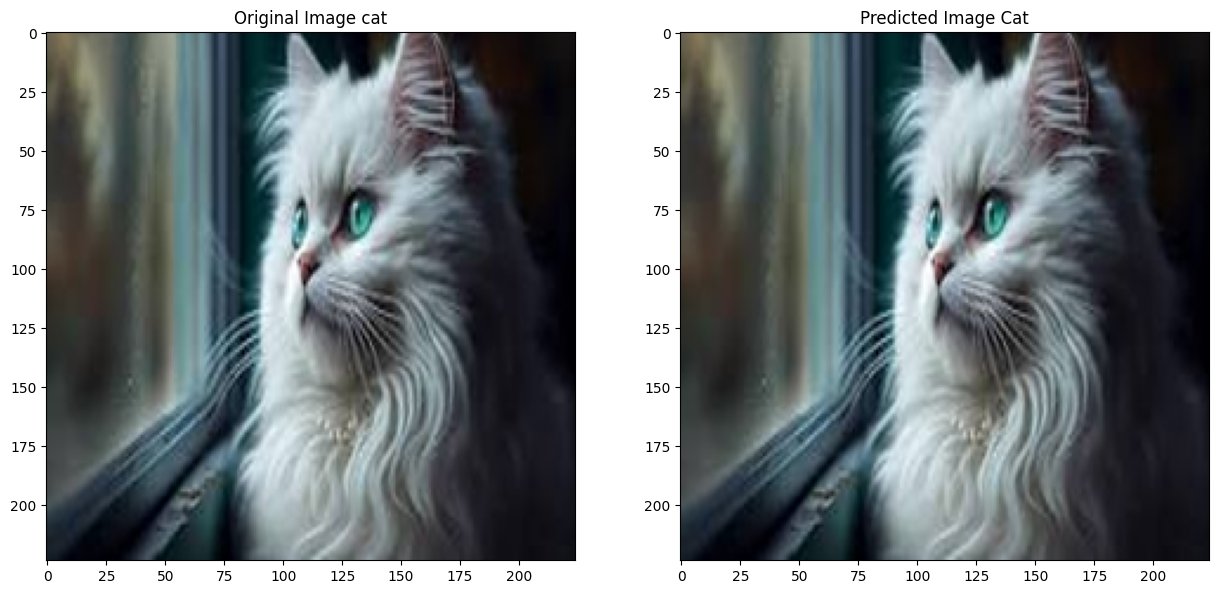

In [ ]:
process_predict_image('/content/cat2.jpeg',model=train_model2,name="cat")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


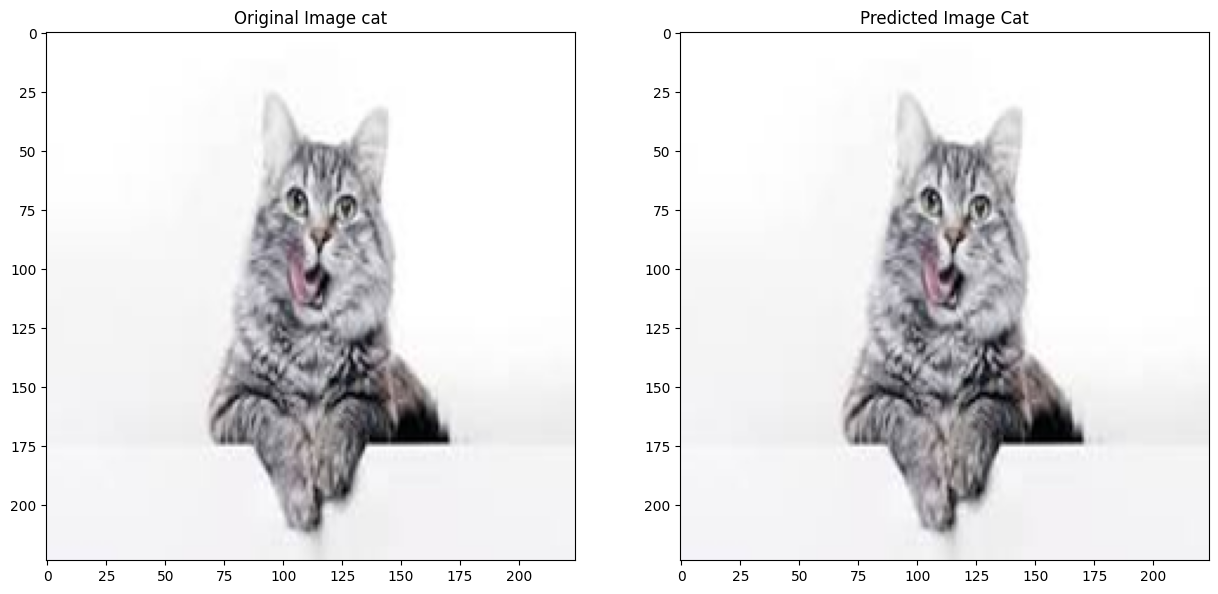

In [ ]:
process_predict_image('/content/cat3.jpeg',model=train_model2,name="cat")

In [ ]:
test_generator.reset()

# Prediction

In [ ]:
prediction=train_model2.predict(test_generator,steps=len(test_generator),verbose=1)
prediction

64/64 ━━━━━━━━━━━━━━━━━━━━ 27s 410ms/step


array([[0.8723985 ],
       [0.17561756],
       [0.30019158],
       ...,
       [0.5394067 ],
       [0.02085875],
       [0.94601166]], dtype=float32)

# Convert Probility

In [ ]:
# Predicted Classes
pred_class=(prediction>0.5).astype('int32')
pred_class

array([[1],
       [0],
       [0],
       ...,
       [1],
       [0],
       [1]], dtype=int32)

In [ ]:
# Actural Class
true_class=test_generator.classes
true_class

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

# Confussion Matrix

In [ ]:
cm=confusion_matrix(true_class,pred_class)
cm

In [ ]:
plt.figure(figsize=(15,7))
plt.title("Confussion matric")
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.xlabel("Actual Class")
plt.ylabel("Predicted Class")
plt.show()

In [ ]:
print("accuracy: ",accuracy_score(true_class,pred_class))
print("precision: ",precision_score(true_class,pred_class))
print("recall: ",recall_score(true_class,pred_class))
print("f1_score: ",f1_score(true_class,pred_class))

# Save the model

In [ ]:
model2.save('/content/Cat-Dog-Classification/Transfer-Learning/best_model.keras')